In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Gridworld:
    def __init__(self, grid_size=(4, 4), start_state=(0, 0), terminal_states=[(3, 3)]):
        self.grid_size = grid_size
        self.state = start_state
        self.terminal_states = terminal_states

    def step(self, action):
        """Take an action and return next_state, reward, done."""
        if self.state in self.terminal_states:
            return self.state, 0, True

        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.grid_size[0] - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.grid_size[1] - 1)

        self.state = (x, y)
        reward = -1  # Reward for each step
        done = self.state in self.terminal_states
        return self.state, reward, done

    def reset(self):
        self.state = (0, 0)
        return self.state

In [ ]:
def td_learning(env, policy, episodes, alpha, gamma, max_steps=100):
    """
    TD(0) algorithm to estimate the value function.

    Args:
        env: The environment.
        policy: A dictionary mapping states to actions.
        episodes: Number of episodes to train.
        alpha: Learning rate.
        gamma: Discount factor.
        max_steps: Maximum steps per episode.

    Returns:
        value_function: Estimated value function for each state.
    """
    value_function = np.zeros(env.grid_size)

    for episode in range(episodes):
        state = env.reset()
        done = False
        steps = 0

        while not done and steps < max_steps:
            x, y = state
            action = policy[state]
            next_state, reward, done = env.step(action)

            nx, ny = next_state

            value_function[x, y] += alpha * (
                reward + gamma * value_function[nx, ny] - value_function[x, y]
            )

            state = next_state
            steps += 1

        if steps >= max_steps:
            print(f"Episode {episode + 1} reached max steps.")

    return value_function

In [ ]:
grid_size = (4, 4)
terminal_states = [(3, 3)]
env = Gridworld(grid_size=grid_size, terminal_states=terminal_states)

In [ ]:
def deterministic_policy(state):
    x, y = state
    if x < grid_size[0] - 1:
        return 'down'
    elif y < grid_size[1] - 1:
        return 'right'
    else:
        return 'up' 

policy = {
    (x, y): deterministic_policy((x, y))
    for x in range(grid_size[0])
    for y in range(grid_size[1])
}

In [ ]:
episodes = 500
alpha = 0.1
gamma = 0.9
value_function = td_learning(env, policy, episodes, alpha, gamma)

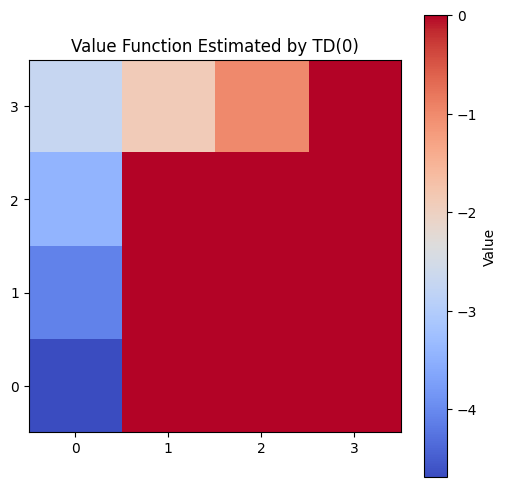

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(value_function, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Value')
plt.title('Value Function Estimated by TD(0)')
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))
plt.gca().invert_yaxis()
plt.show()